Name : Mizba Feroz

Student ID : 230585126

## Wine quality prediction: White Wine dataset

The task is to implement, describe and present regression and/or
classification models of your choice to predict the quality of white wines given a range of
their features. The goal is to develop regression and/or classification models using any
number of the variables provided, which describe wines’ features, to predict their quality
(measured as a score from 0 to 10 based on sensory data from three experts).

**Importing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('winequality-white.csv',sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

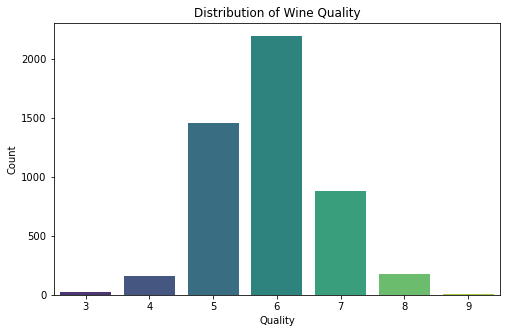

In [3]:
# Explore the distribution of the target variable 'quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

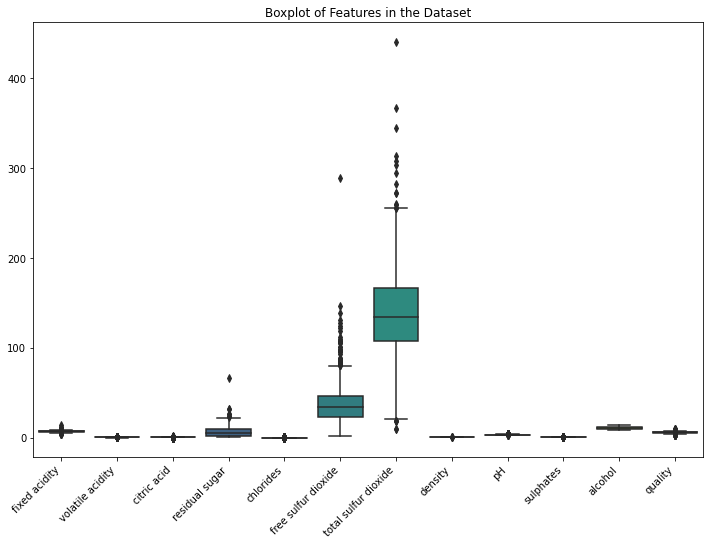

In [4]:
# Examine summary statistics for each feature
summary_stats = df.describe()

# Visualize summary statistics using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='viridis')
plt.title('Boxplot of Features in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
# Display the summary statistics
print("Summary Statistics for Each Feature:")
print(summary_stats)

Summary Statistics for Each Feature:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


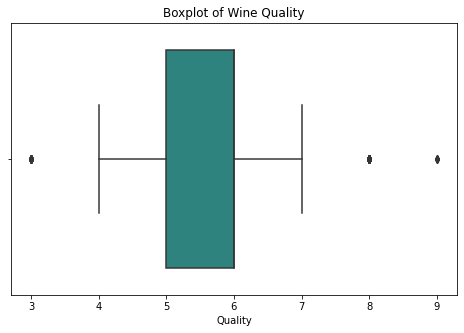

In [7]:
# Visualize outliers in the target variable 'quality'
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', data=df, palette='viridis')
plt.title('Boxplot of Wine Quality')
plt.xlabel('Quality')
plt.show()

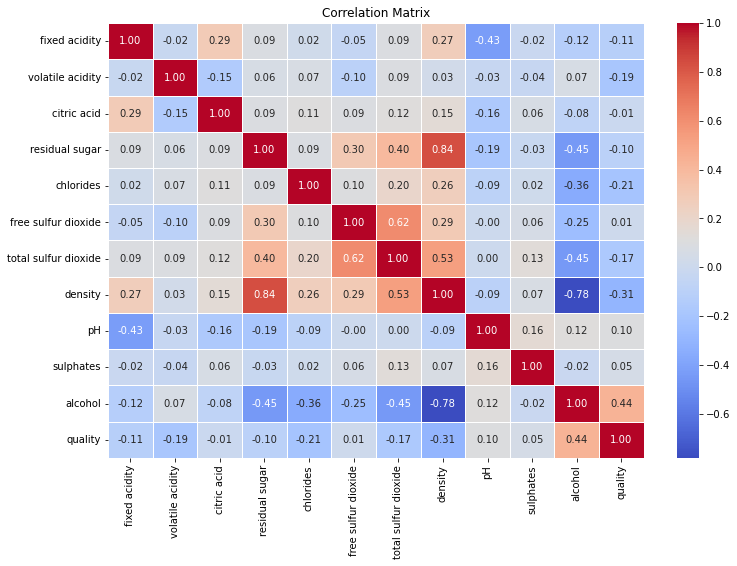

In [8]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation with Quality:
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


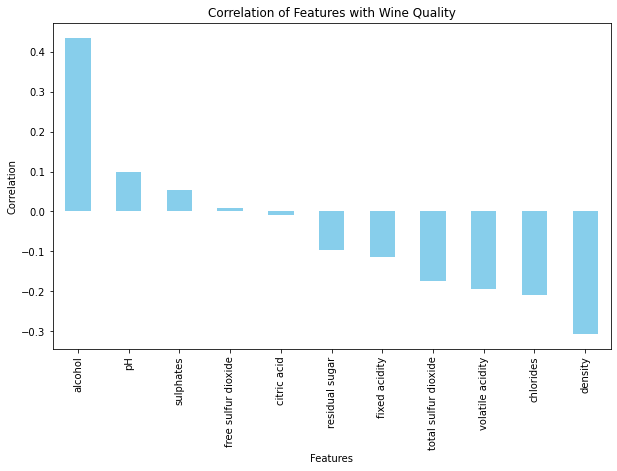

In [9]:
# Extract the correlation values for the target variable, 'quality'
correlation_with_quality = correlation_matrix['quality'].sort_values(ascending=False)

# Printing the correlations
print("Correlation with Quality:")
print(correlation_with_quality)

# Visualize the top correlations using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_quality.drop('quality').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Wine Quality')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


#### Splitting data into test and train set

In [10]:
# Setting y as target variable, 'quality'
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Setting the random seed for reproducibility
np.random.seed(42)

# Define the proportion for the test set
test_size = 0.2

# Determine the number of samples for the test set
num_test_samples = int(test_size * len(X))

# Randomly shuffle indices to create a random split
indices = np.arange(len(X))
np.random.shuffle(indices)

# Splitting the indices into training and testing sets
train_indices, test_indices = indices[num_test_samples:], indices[:num_test_samples]

# Create the training and testing sets
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Displaying the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3919, 11) (3919,)
Testing set shape: (979, 11) (979,)


## Linear Regression

The normal equation used to calculate the coefficients in linear regression is as follows:
$$
\mathbf{X}^{\top}\mathbf{X} \hat{\mathbf{W}} = \mathbf{X}^{\top}\mathbf{Y}
$$
Here $\mathbf{X}$  is the matrix of feature values.
and $\mathbf{Y}$ is the vector of target values, while $\hat{\mathbf{W}}$ is the weights/coefficients of the linear regression.

In [11]:
# Adding a column of ones to X_train for the intercept term
X_train_lr = np.column_stack((np.ones(len(X_train)), X_train))

# Use the normal equation to calculate the coefficients
W = np.linalg.inv(X_train_lr.T @ X_train_lr) @ X_train_lr.T @ y_train

# Extract the intercept and coefficients
intercept = W[0]
coefficients = W[1:]

# Display the coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 124.45024510402352
Coefficients: [ 4.59935491e-02 -1.91526230e+00 -6.07675312e-02  7.12439449e-02
 -2.61884187e-02  5.11328308e-03 -2.39710056e-04 -1.24324745e+02
  6.02183506e-01  6.48640766e-01  2.28881547e-01]


In [12]:
# Adding a column of ones to X_test for the intercept term
X_test_lr = np.column_stack((np.ones(len(X_test)), X_test))

# Make predictions using the linear regression coefficients
y_test_pred = X_test_lr @ W

# Display the predicted values
print("Predicted values on the test data:")
print(y_test_pred)


Predicted values on the test data:
[6.3715702  6.397916   6.41210291 5.83010804 6.43751096 6.36721185
 5.2377012  5.48060455 6.08520649 5.32939862 6.4887671  4.75088261
 6.6449146  5.46931554 7.28313406 5.64444226 6.74639794 5.81641053
 6.14988136 5.33834344 5.7637074  5.99215686 5.67526199 5.84662443
 6.17027632 5.56092999 5.32652614 6.24929814 5.38657064 5.49783031
 5.41647156 5.8912147  5.67325089 5.3094996  5.34911678 6.40895251
 6.53823553 5.31829692 5.31518447 5.66705526 5.96816881 5.5278924
 5.95853042 5.58844224 5.34104988 5.90590854 5.18102466 5.37856722
 5.67576711 5.79414299 4.85735524 5.84917393 5.72969475 6.23559369
 6.01745925 5.80905819 5.82917633 5.85018398 5.9287365  5.63398554
 5.97343677 6.34304032 5.19803346 6.70664231 6.16583116 6.0899563
 5.90022226 5.65049298 6.04999413 5.28687321 5.28032949 6.06846059
 4.66984675 4.45511703 5.88895661 6.46941101 5.90434959 5.74855209
 6.85655842 6.10700194 5.10062309 5.32804673 6.19232688 5.73068704
 6.52541279 6.37559292 5.5972

Finally the **Mean Squared Error(MSE)** is calculated using the formula,
$$
\mathrm{MSE} = \frac{1}{2s} \left\|\mathbf{X}\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\mathbf{X}$  is the matrix of feature values.
and $\mathbf{Y}$ is the vector of target values, while $\hat{\mathbf{W}}$ is the weights/coefficients of the linear regression.

In [13]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_test_pred)**2)

# Display MSE
print("Mean Squared Error (MSE) on the test data:", mse)


Mean Squared Error (MSE) on the test data: 0.5694884856066909


#### Scatter plot to calculate the residuals

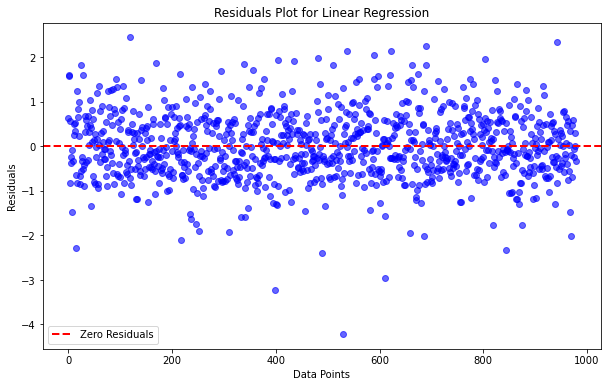

In [14]:
# Calculate the residuals (difference between actual and predicted values)
residuals = y_test - y_test_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## Ridge regression

Ridge Regression is a linear regression variant that introduces regularization to prevent overfitting. The objective function for ridge regression is given by ,

$$ W = \frac{1}{2s} \left\| Xw - y \right\|^2 + \frac{\alpha}{2} \left\| w \right\|^2 $$

In [15]:
class RidgeRegression:
    def __init__(self, alpha=0.01, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None

    def fit(self, X, y):
        # Standardize features
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        X = (X - self.X_mean) / self.X_std

        n_samples, n_features = X.shape
        X = np.column_stack((np.ones(n_samples), X))  # Add a column of ones for intercept
        self.coef_ = np.zeros(n_features + 1)  # Include intercept term

        I = np.eye(n_features + 1)
        I[0, 0] = 0  # Exclude regularization for the intercept term

        for iteration in range(self.max_iter):
            prev_coef = np.copy(self.coef_)
            y_pred = X @ self.coef_
            residuals = y - y_pred
            gradient = -2 * X.T @ residuals / n_samples
            ridge_penalty = 2 * self.alpha * self.coef_
            gradient += ridge_penalty

            # Add a small positive value to the diagonal for stability
            Hessian = 2 * X.T @ X / n_samples + self.alpha * I

            self.coef_ -= np.linalg.inv(Hessian) @ gradient

            if np.linalg.norm(self.coef_ - prev_coef, ord=2) < self.tol:
                break

        return self

    def predict(self, X):
        # Standardize features using the mean and std from the training set
        X = (X - self.X_mean) / self.X_std
        n_samples = X.shape[0]
        X = np.column_stack((np.ones(n_samples), X))  # Adding a column of ones for intercept
        return X @ self.coef_


# Set hyperparameters
alpha = 0.01
max_iter = 1000

# Instantiate and train Ridge Regression
ridge_regressor = RidgeRegression(alpha=alpha, max_iter=max_iter)
X_train_rid = X_train
Y_train_rid = y_train
ridge_regressor.fit(X_train_rid, Y_train_rid)


# Make predictions
y_test_pred = ridge_regressor.predict(X_test)

# Display the predicted values
print("Predicted values on the test data:")
print(y_test_pred)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_test_pred)**2)

# Display MSE
print("Mean Squared Error (MSE) on the test data:", mse)


Predicted values on the test data:
[6.29075823 6.33525165 6.34661706 5.75619514 6.36098811 6.3054287
 5.17282417 5.44004474 6.00954913 5.25740373 6.42881102 4.68855039
 6.57907681 5.44371973 7.18363584 5.58647914 6.67745914 5.76249368
 6.1071878  5.30528751 5.7052378  5.93051615 5.60910371 5.78466467
 6.0849725  5.50069989 5.27596152 6.18099536 5.32360706 5.44848971
 5.3603379  5.82220649 5.59876998 5.24954391 5.29022846 6.35332087
 6.47212231 5.28411391 5.25532287 5.62202378 5.88611074 5.47797926
 5.89310427 5.55417301 5.29094849 5.85470551 5.11386513 5.34364495
 5.62124834 5.73301852 4.80865768 5.78608673 5.67267266 6.17142106
 5.95960869 5.73069284 5.75875798 5.79787407 5.88088768 5.56103085
 5.93961033 6.29308679 5.16795695 6.64527589 6.12699139 6.03108906
 5.84072579 5.57969425 5.98069177 5.2639483  5.21302875 5.98918818
 4.62747548 4.40117901 5.83697371 6.39038145 5.85658736 5.68598762
 6.78109362 6.04495883 5.03355607 5.2853378  6.12678706 5.69447678
 6.44933084 6.31375597 5.542

## KNN Regression

In k-NN regression, the prediction for a new data point is determined by averaging the target values of its k nearest neighbours. For each test point, the Euclidean distance to all training points is calculated by,
$$ d(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2} $$



In [16]:
# Function to calculate euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to predict the values of target variable
def knn_regression_predict(X_train, y_train, X_test, k):
    predictions = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:k]
        k_nearest_targets = y_train[k_nearest_indices]

        # Simple average for regression
        prediction = np.mean(k_nearest_targets)
        predictions.append(prediction)

    return np.array(predictions)

# Set the value of k (number of neighbors)
k_value = 5

# Make predictions on the test set
y_test_pred = knn_regression_predict(X_train, y_train, X_test, k_value)

# Display the predicted values
print("Predicted values on the test data:")
print(y_test_pred)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_test_pred)**2)

# Display MSE
print("Mean Squared Error (MSE) on the test data:", mse)


Predicted values on the test data:
[5.8 6.8 6.2 5.8 6.6 5.2 4.8 4.2 6.  5.  6.2 5.2 5.8 5.4 6.2 5.4 6.4 5.6
 5.8 6.  5.6 5.8 5.4 5.4 6.6 5.6 5.4 6.2 7.  5.6 5.2 5.4 5.2 5.4 5.  7.
 6.  6.2 5.4 5.4 6.4 5.8 5.8 5.8 5.2 6.  5.8 6.6 5.4 5.6 5.4 5.6 5.2 6.2
 6.6 6.  5.6 5.8 5.6 6.4 6.  6.2 5.2 6.  6.  6.2 6.8 6.4 5.8 6.  6.6 6.
 5.6 6.2 5.6 6.2 6.  6.2 5.8 5.8 6.  5.8 6.  6.8 6.  6.8 5.  6.2 5.  6.
 6.4 6.  5.8 6.  6.  6.8 5.2 6.8 6.2 6.8 5.6 6.  6.2 5.8 6.4 5.8 6.4 6.4
 5.6 6.6 5.8 5.8 6.2 5.6 5.6 6.4 6.6 6.8 5.  8.  4.4 6.6 6.8 5.2 6.  6.4
 4.8 5.8 6.2 5.4 5.8 6.6 5.4 6.  5.  6.  6.2 5.6 6.  5.6 6.2 6.  5.4 6.
 6.6 5.6 5.4 5.8 5.2 5.6 6.2 6.  6.4 6.2 6.6 5.4 6.  6.2 5.4 5.8 5.4 5.2
 6.6 5.8 5.8 6.4 6.6 5.6 5.  6.4 5.6 5.8 7.  5.4 6.8 5.2 5.  5.6 6.2 5.2
 6.6 5.8 5.6 6.2 5.6 5.8 6.2 5.  5.2 5.2 5.4 6.  6.6 6.8 6.  5.8 6.6 7.
 5.4 5.2 6.2 5.6 6.4 6.6 5.8 6.  6.  6.2 5.4 5.4 5.6 5.6 7.  6.  5.4 5.6
 5.6 5.8 6.2 6.2 5.6 5.6 5.8 7.  6.2 5.8 6.2 6.6 6.4 5.6 6.  5.4 5.8 5.6
 5.2 6.  6.2 7.  5.6 

## Using Sci-kit learn

### Linear Regression using Sci-kit learn

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop the target variable ('quality')
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = linear_regressor.predict(X_test)

# Display the predicted values
print("Predicted values on the test data:")
print(y_test_pred)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Predicted values on the test data:
[6.3718293  6.39819558 6.41184115 5.8298407  6.43750933 6.36666274
 5.23761241 5.48030317 6.08525555 5.32939063 6.48840979 4.75062408
 6.64482109 5.46899736 7.2836232  5.64425647 6.74657074 5.81601279
 6.1499309  5.33837093 5.76352998 5.99161371 5.67524151 5.8464263
 6.17011674 5.56069533 5.32646626 6.24915834 5.38643461 5.49761952
 5.41635994 5.89138707 5.67302737 5.30932517 5.34896505 6.40888157
 6.53803717 5.3180697  5.31512804 5.66669648 5.96832992 5.5282457
 5.95849306 5.58835697 5.3409576  5.90541044 5.18072936 5.37841758
 5.67576485 5.7945028  4.85709232 5.84913233 5.72988937 6.23571885
 6.01691471 5.80877638 5.82842751 5.85000456 5.92851381 5.63408943
 5.97316492 6.34292652 5.1976136  6.70693147 6.16580078 6.08953322
 5.89970616 5.65046742 6.0500044  5.28675595 5.28011815 6.06841673
 4.66973539 4.45514111 5.88903629 6.46984012 5.90428513 5.74806218
 6.85635156 6.10698802 5.10052684 5.32757968 6.19226023 5.73052594
 6.52529136 6.37563379 5.5972

### Ridge regression using sci-kit learn

In [18]:
from sklearn.linear_model import Ridge

# Set hyperparameters
alpha = 0.01

# Instantiate and train Ridge Regression
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = ridge_regressor.predict(X_test)

# Display the predicted values
print("Predicted values on the test set:")
print(y_test_pred)

# Clculating Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE) on the test set: {mse}")


Predicted values on the test set:
[6.31122195 6.38910269 6.40141211 5.75895488 6.39632052 6.36606493
 5.19876808 5.51424346 6.01617791 5.27035249 6.4926258  4.67751878
 6.6370556  5.56790631 7.27407492 5.62917848 6.72727157 5.7983027
 6.208512   5.39824204 5.77574443 5.98725201 5.64929033 5.85138893
 6.09236687 5.54010087 5.32960066 6.21994391 5.37741182 5.52526993
 5.40228348 5.87170222 5.60766485 5.25997803 5.3214721  6.42803379
 6.5307823  5.39116212 5.29472166 5.67027036 5.90780382 5.55802339
 5.9087641  5.62640868 5.3557501  5.94830341 5.12788083 5.45687127
 5.68126567 5.80722037 4.81707792 5.85176987 5.7126627  6.22749682
 6.01652149 5.71249456 5.77121437 5.85139498 5.95668591 5.58713889
 6.0751596  6.36681455 5.25406833 6.70905602 6.25190654 6.09725602
 5.86532915 5.62724085 6.01635216 5.40535005 5.22512802 6.00230618
 4.63888583 4.39776767 5.91463783 6.43321481 5.92879368 5.71315174
 6.8180283  6.10559657 5.03690047 5.34112156 6.18122216 5.82774806
 6.48675589 6.38675188 5.5942

### k-NN Regression using Sci-kit learn

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Display the predicted values
print("Predicted values on the test data:")
print(y_test_pred)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Predicted values on the test data:
[5.8 6.8 6.2 5.8 6.6 5.2 4.8 4.2 6.  5.  6.2 5.2 5.8 5.4 6.2 5.4 6.4 5.6
 5.8 6.  5.6 5.8 5.4 5.4 6.6 5.6 5.4 6.2 7.  5.6 5.2 5.4 5.2 5.4 5.  7.
 6.  6.2 5.4 5.4 6.4 5.8 5.8 5.8 5.2 6.  5.8 6.6 5.4 5.6 5.4 5.6 5.2 6.2
 6.6 6.  5.6 5.8 5.6 6.4 6.  6.2 5.2 6.  6.  6.2 6.8 6.4 5.8 6.  6.6 6.
 5.6 6.2 5.6 6.2 6.  6.2 5.8 5.8 6.  5.8 6.  6.8 6.  6.8 5.  6.2 5.  6.
 6.4 6.  5.8 6.  6.  6.8 5.2 6.8 6.2 6.8 5.6 6.  6.2 5.8 6.4 5.8 6.4 6.4
 5.6 6.6 5.8 5.8 6.2 5.6 5.6 6.4 6.6 6.8 5.  8.  4.4 6.6 6.8 5.2 6.  6.4
 4.8 5.8 6.2 5.4 5.8 6.6 5.4 6.  5.  6.  6.2 5.6 6.  5.6 6.2 6.  5.4 6.
 6.6 5.6 5.4 5.8 5.2 5.6 6.2 6.  6.4 6.2 6.6 5.4 6.  6.2 5.4 5.8 5.4 5.2
 6.6 5.8 5.8 6.4 6.6 5.6 5.  6.4 5.6 5.8 7.  5.4 6.8 5.2 5.  5.6 6.2 5.2
 6.6 5.8 5.6 6.2 5.6 5.8 6.2 5.  5.2 5.2 5.4 6.  6.6 6.8 6.  5.8 6.6 7.
 5.4 5.2 6.2 5.6 6.4 6.6 5.8 6.  6.  6.2 5.4 5.4 5.6 5.6 7.  6.  5.4 5.6
 5.6 5.8 6.2 6.2 5.6 5.6 5.8 7.  6.2 5.8 6.2 6.6 6.4 5.6 6.  5.4 5.8 5.6
 5.2 6.  6.2 7.  5.6 